In [27]:
import analysis_functions as af
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import optimize

data = np.loadtxt(r"../data/stat_anal_test1.txt", usecols =(1))
print(data.shape)

plt.style.use("seaborn")

(60000,)


Read an observable from the data file, study one observable at the time

## Thermalization study

Study the state of thermalization by choosing a perc percentage parameter and 
checking whether the variance and mean are consistent in the sample and in the total data set


58800
14


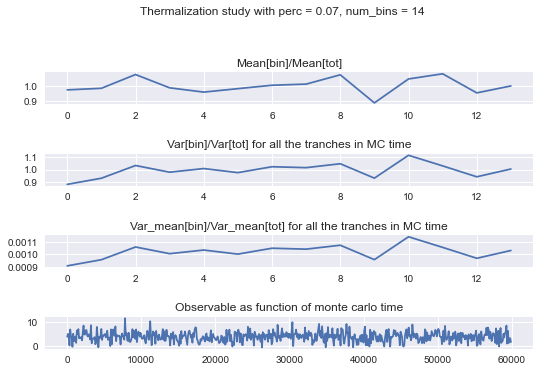

In [2]:
perc = 0.07
mean_ens = af.mean(data)
var_ens = af.var(data)
var_mean_ens = af.mean_var(data)
N = int(np.floor(perc*len(data[:])))

num = int(np.floor(1/perc))
print(num*N)

thermaliz = np.array([[af.mean(data[N*k:N*k+N]),af.var(data[N*k:N*k+N]),
                            af.mean_var(data[N*k:N*k+N])] 
                          for k in range(num)])


print(len(thermaliz))
x = np.arange(0,num)
time = np.arange(len(data))
#fig = plt.figure(num = None, figsize=(12,12), dpi= 80, edgecolor="k")
#fig.canvas.set_window_title("Thermalization study")



fig,axs = plt.subplots(4)
fig.suptitle("Thermalization study with perc = {}, num_bins = {}".format(perc,num))
fig.tight_layout(pad=3.0)
axs[0].plot(x,thermaliz[:,0]/mean_ens)
axs[1].plot(x,thermaliz[:,1]/var_ens)
axs[2].plot(x,thermaliz[:,2])
axs[3].plot(time[::100],data[::100])
axs[0].title.set_text("Mean[bin]/Mean[tot]")
axs[1].title.set_text("Var[bin]/Var[tot] for all the tranches in MC time")
axs[2].title.set_text("Var_mean[bin]/Var_mean[tot] for all the tranches in MC time")
axs[3].title.set_text("Observable as function of monte carlo time")
plt.show()
fig.savefig("Thermalization_test")

## Find the autocorrelation length of the dataset
Plot C(t)/C(0) where t is the distance between MCMC time as function 
of t and fit the exponential e(-t/tau)

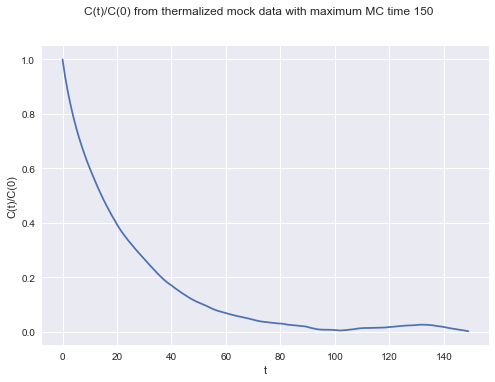

In [31]:
#create autocorrelation array

  

#tmax = np.array([50, 150, 300, 500])
#tau = tmax[3]
tmax = 150


corr_t = 1/af.var(data)*np.array([af.autocorrelation(data,t)  for t in range(tmax)])

time = np.arange(tmax)
fig,ax = plt.subplots()
fig.suptitle("C(t)/C(0) from thermalized mock data with maximum MC time {}".format(tmax))
ax.plot(time,corr_t)
ax.set_xlabel("t")
ax.set_ylabel("C(t)/C(0)")
plt.savefig("C(t)_mockdata ")
plt.show()

Correlation mean 0.15199873443012554	Correlation var 0.22223874674841057

Average = 3.8970207107225274
 Variance of the mean = 7.185304956854974e-05
 Autocorrelated variance of the mean= 0.003305761764202026



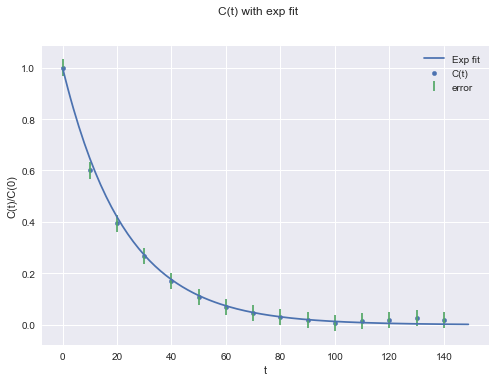

In [33]:
## Autocorrelation study

#fit exponential

#error propagation

#error in C(t)

corr_t_mean = af.mean(corr_t)
corr_t_var = af.var(corr_t)
err_bars = 1/np.sqrt(af.chisquared(corr_t))*np.sqrt(corr_t_var)*np.ones(tmax)
print("Correlation mean {}\tCorrelation var {}\n".format(corr_t_mean,np.sqrt(corr_t_var)))
#scipi optimize coefficients
a = 1
b = -0.04347825 
fit_exp = np.array([a*np.exp(b*t) for t in time])
plt.plot(fit_exp, label="Exp fit")
plt.scatter(time[::10],corr_t[::10],s=20, label="C(t)", )
plt.errorbar(time[::10],corr_t[::10],yerr=err_bars[::10], linestyle="None", label="error")
plt.ylabel("C(t)/C(0)")
plt.xlabel("t")
plt.suptitle("C(t) with exp fit")
plt.savefig("C(t)_fit")
plt.legend()
#autocorrelation time
tau = -1/b
#print("Chisquared = {}",format(af.chisquared(fit_exp - corr_t)))

print("Average = {}\n Variance of the mean = {}\n Autocorrelated variance of the mean= {}\n"
      .format(af.mean(data), af.mean_var(data), af.mean_var_autocorr(data,tau)))
#scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  time, corr_t,p0=(1,0))

range = [0,1]
10000 data 

autocorrelation of time NUMBERmOCKDATA/RANDOM NUMBERS USED

each random number is a bin

on each bin conmpute autocorrelation function
fit exponential on each autocorrelation
compute for all


I need to do the fit first ( bin with JK)



Error propagation with JK:
1) Bin data as X(S_k) with m = around k integration time
2) Generate JK bin X_JK
3)

In [29]:
#first we bin for the m > 2*tau_int


bins = af.binning(data,10)
print(bins.shape)
#data_bin = af.binning(data,m)
#print(data_bin.shape)

#plt.plot(data_bin)
#print("Bin mean = {} \t Bin Var = {} \n".format(af.mean(data_bin),af.var(data_bin)))
#We can show that these data points can be seen as uncorrelated

num_bins
(6000,)


In [ ]:
#JK error propagation
def JK_binning(bin, nu):
    jk_bins = np.zeros(nu)
    


#nu = int(len(data)/len(data_bin))
#bin_JK = af.JK_binning(data_bin,nu)

